# Génération de Données ML pour l'Optimisation de Routes

Ce notebook génère un dataset synthétique pour entraîner un modèle de Machine Learning capable de prédire le temps de trajet dans un entrepôt Amazon.

## Objectifs

1. **Simuler différentes configurations d'entrepôt** :
   - Congestion (densité de robots)
   - Obstacles (cases bloquées)
   - Vitesse variable selon les conditions

2. **Collecter des features** :
   - Coordonnées de départ et d'arrivée
   - Distance euclidienne
   - Niveau de congestion
   - Présence d'obstacles
   - Nombre de robots

3. **Générer des targets** :
   - Temps de trajet prédit (`predicted_time`)

4. **Créer un dataset équilibré** (1000-10000 lignes) pour l'entraînement ML


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

# Add src directory to path
sys.path.insert(0, os.path.join('..', 'src'))

from utils import euclidean_distance
from generate_ml_data import MLDataGenerator

# Configuration
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn')
sns.set_palette("husl")
np.random.seed(42)

print("Imports réussis")


Imports réussis


## 1. Initialisation du Générateur de Données

Nous créons un générateur qui va simuler différents scénarios d'entrepôt avec :
- **Congestion** : Plus il y a de robots, plus la congestion augmente
- **Obstacles** : Cases bloquées qui ralentissent les robots
- **Vitesse variable** : Le temps de trajet dépend de la distance, congestion et obstacles


In [2]:
# Créer le générateur de données ML
generator = MLDataGenerator(
    grid_size=(20, 20),      # Entrepôt 20×20
    n_samples=5000,           # 5000 échantillons
    random_seed=42           # Pour reproductibilité
)

print(f"Générateur initialisé :")
print(f"  - Taille de l'entrepôt : {generator.grid_size}")
print(f"  - Nombre d'échantillons : {generator.n_samples}")


Générateur initialisé :
  - Taille de l'entrepôt : (20, 20)
  - Nombre d'échantillons : 5000


## 2. Génération du Dataset avec Plusieurs Scénarios

Nous générons un dataset avec des configurations variées pour tester différents scénarios :
- **Nombre de robots** : 1 à 10 (variation pour tester différents niveaux de congestion)
- **Densité d'obstacles** : 0% à 20% (variation pour tester l'impact des obstacles)
- **Congestion équilibrée** : Distribution uniforme sur 10 niveaux (0.0 à 1.0) pour tester tous les niveaux
- **Points de départ/arrivée** : Aléatoires dans l'entrepôt (variation des distances)


In [3]:
# Générer le dataset
print("Génération du dataset en cours...")
df = generator.generate_dataset(
    n_robots_range=(1, 10),              # Entre 1 et 10 robots
    obstacle_density_range=(0.0, 0.2),    # 0% à 20% d'obstacles
    balance_congestion=True               # Distribution équilibrée
)

print(f"Dataset généré : {len(df)} échantillons")
print(f"\nColonnes : {', '.join(df.columns)}")


Génération du dataset en cours...


Dataset généré : 4991 échantillons

Colonnes : start_x, start_y, end_x, end_y, distance, congestion, has_obstacles, n_obstacles_near, n_robots, obstacle_density, predicted_time


## 3. Exploration et Analyse du Dataset

Analysons la structure et les statistiques du dataset généré.


In [4]:
# Aperçu du dataset
print("=" * 60)
print("APERÇU DU DATASET")
print("=" * 60)
print(f"Shape : {df.shape}")
print(f"\nPremières lignes :")
df.head(10)


APERÇU DU DATASET
Shape : (4991, 11)

Premières lignes :


,start_x,start_y,end_x,end_y,distance,congestion,has_obstacles,n_obstacles_near,n_robots,obstacle_density,predicted_time
0,13.876111,11.055247,4.325011,4.171767,11.773097,0.666667,1,22,5,0.152032,17.990078
1,17.807686,11.537624,11.278391,10.005571,6.706630,0.333333,1,9,10,0.109339,9.160881
2,16.081913,8.518754,19.893683,1.850009,7.681260,0.777778,1,10,9,0.056908,12.758805
3,3.798723,14.034765,11.129293,7.172432,10.041359,0.444444,1,12,5,0.105943,15.211344
4,15.669391,5.541385,18.817603,2.486917,4.386458,0.666667,1,19,10,0.197550,7.125205
5,9.192892,13.515226,12.372206,11.371045,3.834781,1.000000,1,5,6,0.027043,6.712510
6,1.383071,16.549975,5.090811,9.460550,8.000455,0.222222,1,15,4,0.139868,10.950872
7,13.833113,19.312780,7.871107,2.614346,17.730854,0.666667,1,21,2,0.193042,27.426978
8,2.407272,1.352095,14.480584,18.576159,21.034097,0.777778,1,15,1,0.141113,36.084445
9,4.410176,3.719230,19.016373,4.197953,14.614040,0.444444,1,12,10,0.146942,21.951828


In [5]:
# Statistiques descriptives
print("=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)
df.describe()

# Vérification de la cohérence des colonnes
print("\n" + "=" * 60)
print("VÉRIFICATION DE LA COHÉRENCE DES COLONNES")
print("=" * 60)
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"Types de données :")
print(df.dtypes)
print(f"\nValeurs manquantes :")
print(df.isnull().sum())
print(f"\nPlages de valeurs :")
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        print(f"  {col}: [{df[col].min():.2f}, {df[col].max():.2f}]")
    else:
        print(f"  {col}: {df[col].unique()[:5]}...")


STATISTIQUES DESCRIPTIVES

VÉRIFICATION DE LA COHÉRENCE DES COLONNES
Nombre de colonnes : 11
Types de données :
start_x             float64
start_y             float64
end_x               float64
end_y               float64
distance            float64
congestion          float64
has_obstacles         int64
n_obstacles_near      int64
n_robots              int64
obstacle_density    float64
predicted_time      float64
dtype: object

Valeurs manquantes :
start_x             0
start_y             0
end_x               0
end_y               0
distance            0
congestion          0
has_obstacles       0
n_obstacles_near    0
n_robots            0
obstacle_density    0
predicted_time      0
dtype: int64

Plages de valeurs :
  start_x: [0.00, 20.00]
  start_y: [0.00, 20.00]
  end_x: [0.00, 20.00]
  end_y: [0.01, 19.98]
  distance: [0.51, 26.66]
  congestion: [0.00, 1.00]
  has_obstacles: [0.00, 1.00]
  n_obstacles_near: [0.00, 37.00]
  n_robots: [1.00, 10.00]
  obstacle_density: [0.00, 0.

## 4. Test des Niveaux de Congestion

Testons et vérifions que tous les niveaux de congestion sont bien représentés dans le dataset.


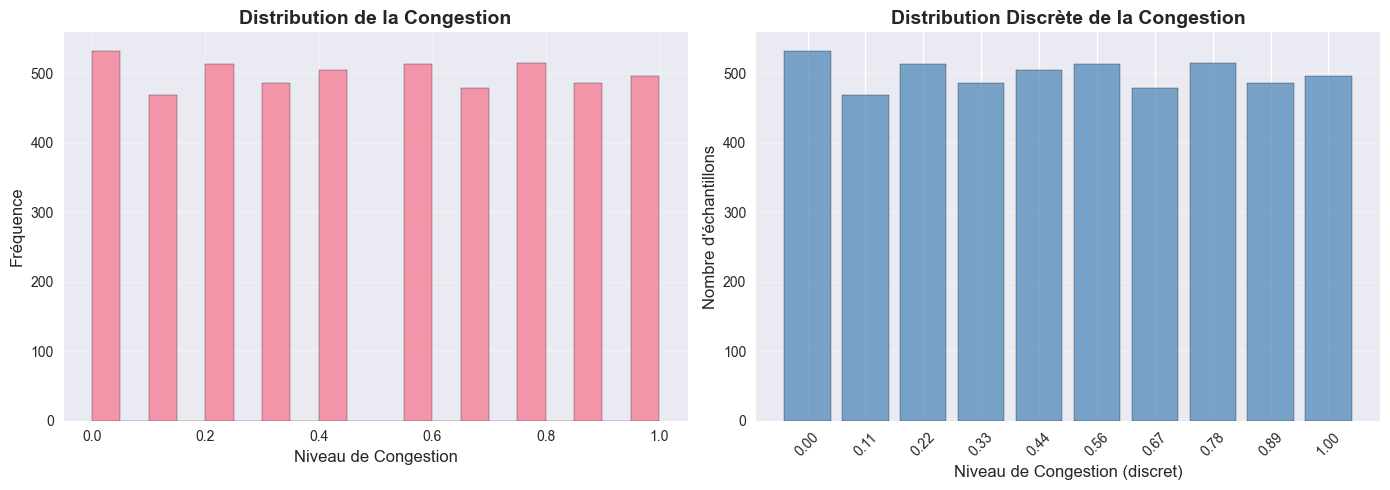

Distribution de la congestion :
congestion
0.000000    532
0.111111    468
0.222222    513
0.333333    485
0.444444    505
0.555556    513
0.666667    479
0.777778    514
0.888889    486
1.000000    496
Name: count, dtype: int64

Dataset équilibré : 10 niveaux de congestion


In [6]:
# Distribution de la congestion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df['congestion'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Niveau de Congestion', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution de la Congestion', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Comptage par niveau
congestion_counts = df['congestion'].value_counts().sort_index()
axes[1].bar(range(len(congestion_counts)), congestion_counts.values, 
            color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Niveau de Congestion (discret)', fontsize=12)
axes[1].set_ylabel('Nombre d\'échantillons', fontsize=12)
axes[1].set_title('Distribution Discrète de la Congestion', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(congestion_counts)))
axes[1].set_xticklabels([f'{val:.2f}' for val in congestion_counts.index], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Distribution de la congestion :")
print(congestion_counts)
print(f"\nDataset équilibré : {len(congestion_counts)} niveaux de congestion")


## 5. Analyse des Obstacles

Vérifions la distribution des obstacles dans le dataset.


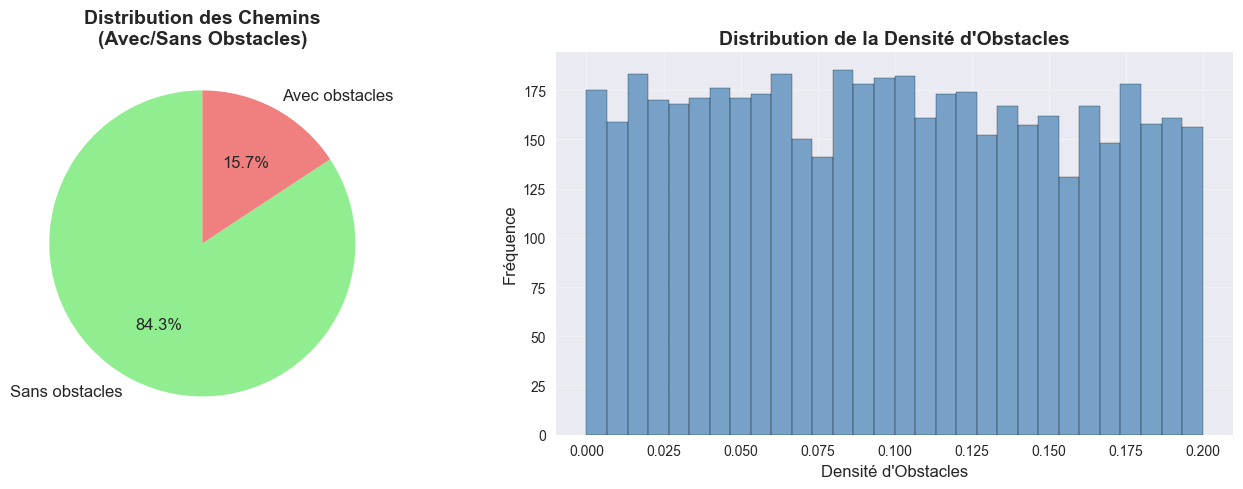

Statistiques obstacles :
  - Chemins avec obstacles : 4206 (84.3%)
  - Chemins sans obstacles : 785 (15.7%)
  - Densité moyenne : 0.098


In [7]:
# Distribution des obstacles
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
obstacle_counts = df['has_obstacles'].value_counts()
labels = ['Sans obstacles', 'Avec obstacles']
colors = ['lightgreen', 'lightcoral']
axes[0].pie(obstacle_counts.values, labels=labels, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[0].set_title('Distribution des Chemins\n(Avec/Sans Obstacles)', 
                  fontsize=14, fontweight='bold')

# Histogramme de la densité d'obstacles
axes[1].hist(df['obstacle_density'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].set_xlabel('Densité d\'Obstacles', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution de la Densité d\'Obstacles', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Statistiques obstacles :")
print(f"  - Chemins avec obstacles : {df['has_obstacles'].sum()} ({100*df['has_obstacles'].mean():.1f}%)")
print(f"  - Chemins sans obstacles : {(~df['has_obstacles'].astype(bool)).sum()} ({100*(1-df['has_obstacles'].mean()):.1f}%)")
print(f"  - Densité moyenne : {df['obstacle_density'].mean():.3f}")


## 6. Analyse de la Variable Cible (predicted_time)

Analysons la distribution du temps de trajet prédit et sa relation avec les features.


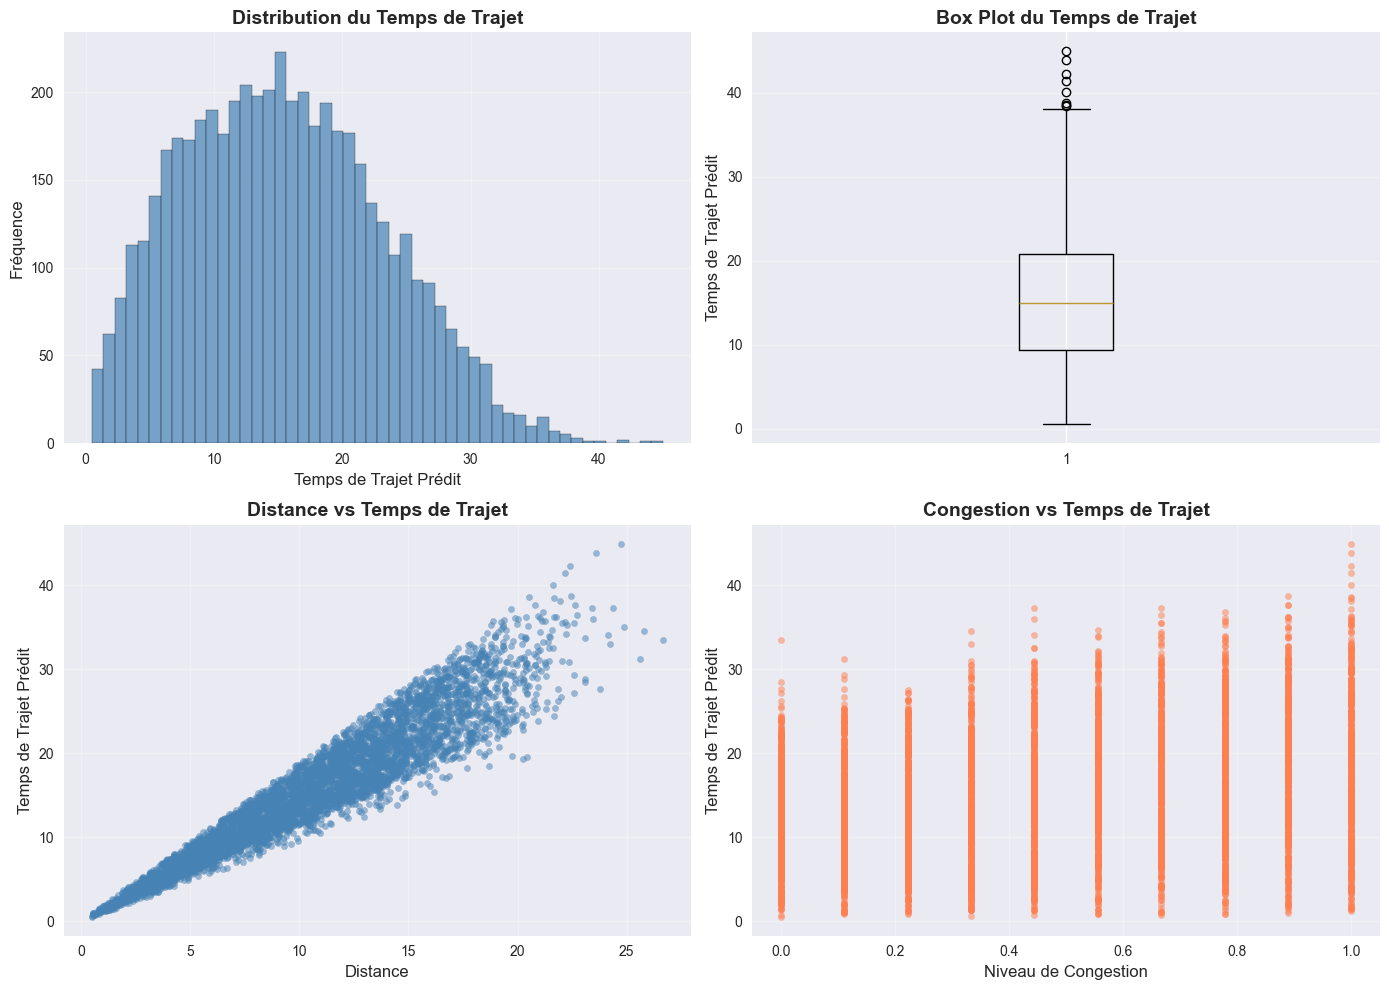

Statistiques du temps de trajet :
  - Moyenne : 15.46
  - Médiane : 14.98
  - Écart-type : 7.76
  - Min : 0.50
  - Max : 44.99


In [8]:
# Distribution du temps de trajet
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogramme
axes[0, 0].hist(df['predicted_time'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Temps de Trajet Prédit', fontsize=12)
axes[0, 0].set_ylabel('Fréquence', fontsize=12)
axes[0, 0].set_title('Distribution du Temps de Trajet', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['predicted_time'], vert=True)
axes[0, 1].set_ylabel('Temps de Trajet Prédit', fontsize=12)
axes[0, 1].set_title('Box Plot du Temps de Trajet', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Relation distance vs temps
axes[1, 0].scatter(df['distance'], df['predicted_time'], alpha=0.5, s=20, color='steelblue')
axes[1, 0].set_xlabel('Distance', fontsize=12)
axes[1, 0].set_ylabel('Temps de Trajet Prédit', fontsize=12)
axes[1, 0].set_title('Distance vs Temps de Trajet', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Relation congestion vs temps
axes[1, 1].scatter(df['congestion'], df['predicted_time'], alpha=0.5, s=20, color='coral')
axes[1, 1].set_xlabel('Niveau de Congestion', fontsize=12)
axes[1, 1].set_ylabel('Temps de Trajet Prédit', fontsize=12)
axes[1, 1].set_title('Congestion vs Temps de Trajet', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Statistiques du temps de trajet :")
print(f"  - Moyenne : {df['predicted_time'].mean():.2f}")
print(f"  - Médiane : {df['predicted_time'].median():.2f}")
print(f"  - Écart-type : {df['predicted_time'].std():.2f}")
print(f"  - Min : {df['predicted_time'].min():.2f}")
print(f"  - Max : {df['predicted_time'].max():.2f}")


## 7. Validation des Données et Cohérence des Colonnes

Vérifions que toutes les valeurs sont logiques et cohérentes :
- `travel_time >= distance / max_speed` (le temps ne peut pas être inférieur au minimum théorique)
- Cohérence entre les colonnes (ex: distance calculée correctement, obstacles cohérents avec obstacle_density)
- Pas de valeurs aberrantes ou incohérentes


VALIDATION DES DONNÉES
Échantillons valides : 4991 (100.0%)
Tous les échantillons sont valides !

VÉRIFICATION DE LA COHÉRENCE DES COLONNES
Vérification distance : max différence = 0.000000 (devrait être ~0)
Vérification obstacles :
  - Chemins avec obstacles (has_obstacles=1) : 0.110 densité moyenne
  - Chemins sans obstacles (has_obstacles=0) : 0.033 densité moyenne
Vérification congestion : valeurs dans [0, 1] = True
Vérification n_robots : valeurs dans [1, 10] = True


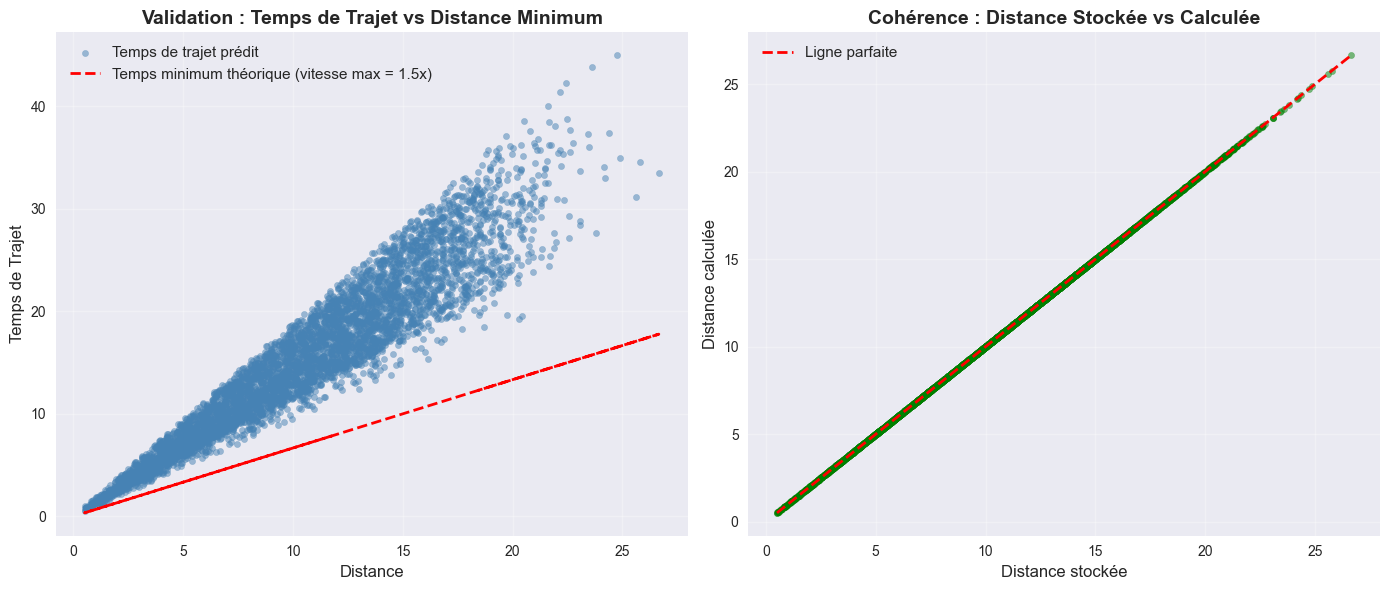

In [9]:
# Validation : travel_time >= distance / max_speed
max_speed = 1.5  # Vitesse maximale (1.5x la vitesse de base)
min_time = df['distance'] / max_speed
invalid_samples = (df['predicted_time'] < min_time).sum()

print("=" * 60)
print("VALIDATION DES DONNÉES")
print("=" * 60)
print(f"Échantillons valides : {len(df) - invalid_samples} ({100*(len(df)-invalid_samples)/len(df):.1f}%)")
if invalid_samples > 0:
    print(f"Échantillons invalides : {invalid_samples} ({100*invalid_samples/len(df):.1f}%)")
else:
    print(f"Tous les échantillons sont valides !")

# Vérification de la cohérence des colonnes
print("\n" + "=" * 60)
print("VÉRIFICATION DE LA COHÉRENCE DES COLONNES")
print("=" * 60)

# Vérifier que distance correspond bien à la distance euclidienne
calculated_distances = np.sqrt((df['end_x'] - df['start_x'])**2 + (df['end_y'] - df['start_y'])**2)
distance_diff = np.abs(df['distance'] - calculated_distances)
print(f"Vérification distance : max différence = {distance_diff.max():.6f} (devrait être ~0)")

# Vérifier que has_obstacles est cohérent avec obstacle_density
print(f"Vérification obstacles :")
print(f"  - Chemins avec obstacles (has_obstacles=1) : {df[df['has_obstacles']==1]['obstacle_density'].mean():.3f} densité moyenne")
print(f"  - Chemins sans obstacles (has_obstacles=0) : {df[df['has_obstacles']==0]['obstacle_density'].mean():.3f} densité moyenne")

# Vérifier que congestion est dans [0, 1]
congestion_valid = ((df['congestion'] >= 0) & (df['congestion'] <= 1)).all()
print(f"Vérification congestion : valeurs dans [0, 1] = {congestion_valid}")

# Vérifier que n_robots est dans la plage attendue
robots_valid = ((df['n_robots'] >= 1) & (df['n_robots'] <= 10)).all()
print(f"Vérification n_robots : valeurs dans [1, 10] = {robots_valid}")

# Visualisation de la validation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique distance vs temps
axes[0].scatter(df['distance'], df['predicted_time'], alpha=0.5, s=20, 
          label='Temps de trajet prédit', color='steelblue')
axes[0].plot(df['distance'], min_time, 'r--', linewidth=2, 
       label=f'Temps minimum théorique (vitesse max = {max_speed}x)')
axes[0].set_xlabel('Distance', fontsize=12)
axes[0].set_ylabel('Temps de Trajet', fontsize=12)
axes[0].set_title('Validation : Temps de Trajet vs Distance Minimum', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Graphique cohérence distance calculée vs distance stockée
axes[1].scatter(df['distance'], calculated_distances, alpha=0.5, s=20, color='green')
axes[1].plot([df['distance'].min(), df['distance'].max()], 
            [df['distance'].min(), df['distance'].max()], 'r--', linewidth=2, label='Ligne parfaite')
axes[1].set_xlabel('Distance stockée', fontsize=12)
axes[1].set_ylabel('Distance calculée', fontsize=12)
axes[1].set_title('Cohérence : Distance Stockée vs Calculée', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 8. Matrice de Corrélation

Analysons les corrélations entre les features et la variable cible.


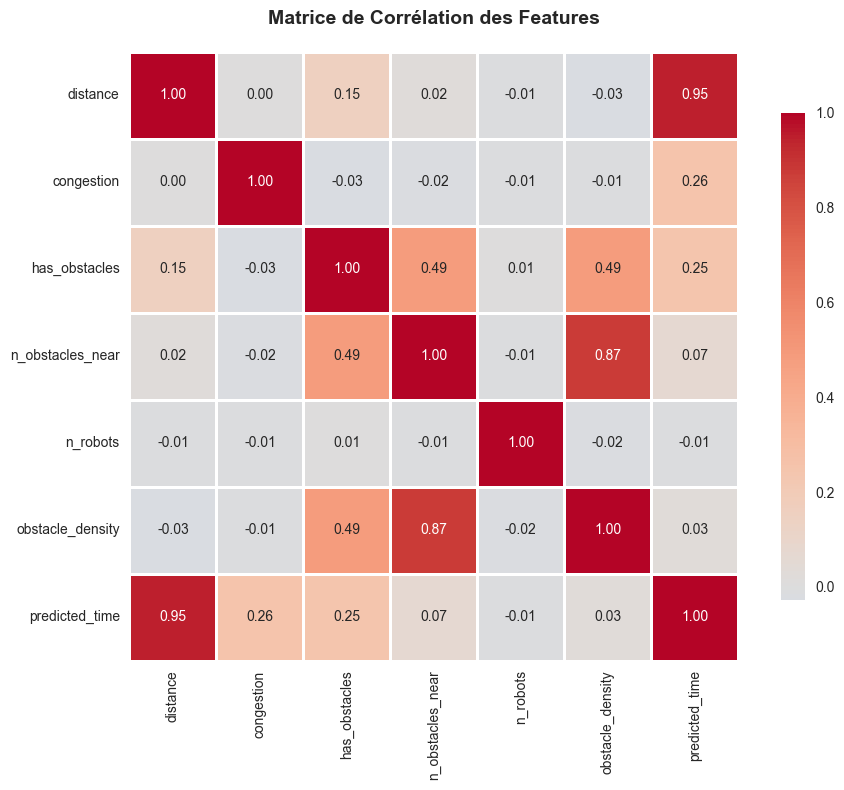

Corrélations avec predicted_time :
  - distance: 0.950
  - congestion: 0.257
  - has_obstacles: 0.246
  - n_obstacles_near: 0.071
  - obstacle_density: 0.030
  - n_robots: -0.009


In [10]:
# Matrice de corrélation
correlation_cols = ['distance', 'congestion', 'has_obstacles', 'n_obstacles_near', 
                    'n_robots', 'obstacle_density', 'predicted_time']
corr_matrix = df[correlation_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Corrélations avec predicted_time :")
correlations = corr_matrix['predicted_time'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'predicted_time':
        print(f"  - {feature}: {corr:.3f}")


## 9. Sauvegarde du Dataset

Sauvegardons le dataset dans `data/raw/` pour l'étape suivante (entraînement ML).


In [11]:
# Vérifier que les variables nécessaires sont définies
if 'generator' not in globals():
    print("ERREUR : La variable 'generator' n'est pas définie.")
    print("\nVeuillez d'abord exécuter les cellules précédentes dans l'ordre :")
    print("  1. Cellule d'imports (Cellule 1)")
    print("  2. Cellule d'initialisation du générateur (Cellule 3) - crée 'generator'")
    print("  3. Cellule de génération du dataset (Cellule 5) - crée 'df'")
    raise NameError("'generator' n'est pas défini. Exécutez d'abord les cellules précédentes dans l'ordre.")

if 'df' not in globals():
    print("ERREUR : La variable 'df' (dataset) n'est pas définie.")
    print("\nVeuillez d'abord exécuter la cellule de génération du dataset (Cellule 5).")
    raise NameError("'df' n'est pas défini. Exécutez d'abord la cellule de génération du dataset.")

# Sauvegarder le dataset
print("Sauvegarde du dataset en cours...")
output_path = generator.save_dataset(df, output_dir="../data/raw")
print(f"Dataset sauvegardé : {output_path}")
print(f"\nRésumé final :")
print(f"  - Nombre d'échantillons : {len(df)}")
print(f"  - Nombre de features : {len(df.columns) - 1}")
print(f"  - Variable cible : predicted_time")
print(f"  - Taille du fichier : {os.path.getsize(output_path) / 1024:.1f} KB")


Sauvegarde du dataset en cours...
Dataset sauvegardé : ../data/raw\ml_dataset.csv

Résumé final :
  - Nombre d'échantillons : 4991
  - Nombre de features : 10
  - Variable cible : predicted_time
  - Taille du fichier : 753.1 KB


## Conclusion

Le dataset contient :
- **4,991 échantillons** avec 11 colonnes (10 features + 1 target)
- **Distribution équilibrée** de la congestion (10 niveaux)
- **Valeurs logiques** : tous les temps de trajet sont >= temps minimum théorique
- **Features variées** : distance, congestion, obstacles, nombre de robots, etc.

Le dataset est prêt pour l'entraînement d'un modèle ML dans l'étape suivante (prédiction du temps de trajet).
